In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

In [80]:
AML_Data= pd.read_csv('Money_Laundering_Dataset.csv')
AML_Data

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,99996.0,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,99997.0,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,99998.0,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [81]:
data_backup = AML_Data.copy()

In [82]:
#Dataset Information
AML_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [83]:
AML_Data.isna().sum()

Unnamed: 0          3
step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

In [84]:
#Distribution of lefit transactions & Fraudulent transactions 
AML_Data['isFraud'].value_counts()

isFraud
0.0    99268
1.0      415
Name: count, dtype: int64

In [85]:
#Data Described
AML_Data.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99997.000000,99323.000000,1.000000e+05,9.985700e+04,9.997800e+04,9.994800e+04,1.000000e+05,99683.000000,99929.000000
mean,50000.972579,8.496229,1.736022e+05,8.789148e+05,8.942587e+05,8.805609e+05,1.184041e+06,0.004163,0.000010
std,28866.838833,1.831287,3.443003e+05,2.674992e+06,2.711584e+06,2.402526e+06,2.802350e+06,0.064389,0.003163
min,0.000000,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,25002.000000,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,50001.000000,9.000000,5.274552e+04,2.010000e+04,0.000000e+00,2.082250e+04,4.990918e+04,0.000000,0.000000
75%,75000.000000,10.000000,2.117631e+05,1.908585e+05,2.149436e+05,5.881914e+05,1.058186e+06,0.000000,0.000000
max,99999.000000,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000


In [86]:
#To chech the shape of the dataset
print("Shape of the Dataset:", AML_Data.shape)

Shape of the Dataset: (100000, 12)


In [87]:
# Inspect the data types of each column
print("Data Types".center(50, "#"))
print(AML_Data.dtypes)

####################Data Types####################
Unnamed: 0        float64
step              float64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object


In [88]:
numeric_cols = AML_Data.select_dtypes(include=['number'])

In [89]:
# Calculate and print the mean of numeric columns
print("  mean  ".center(50, "#"))
print("\n")
print(numeric_cols.mean())

#####################  mean  #####################


Unnamed: 0        5.000097e+04
step              8.496229e+00
amount            1.736022e+05
oldbalanceOrg     8.789148e+05
newbalanceOrig    8.942587e+05
oldbalanceDest    8.805609e+05
newbalanceDest    1.184041e+06
isFraud           4.163197e-03
isFlaggedFraud    1.000711e-05
dtype: float64


In [90]:
#Median
print("  median  ".center(50,"#"))
print("\n")
print(numeric_cols.median())

####################  median  ####################


Unnamed: 0        50001.00
step                  9.00
amount            52745.52
oldbalanceOrg     20100.00
newbalanceOrig        0.00
oldbalanceDest    20822.50
newbalanceDest    49909.18
isFraud               0.00
isFlaggedFraud        0.00
dtype: float64


In [91]:
#Mode
print("  mode  ".center(50,"#"))
print("\n")
print(numeric_cols.mode())

#####################  mode  #####################


       Unnamed: 0  step    amount  oldbalanceOrg  newbalanceOrig  \
0             0.0   9.0   2475.13            0.0             0.0   
1             1.0   NaN   6285.19            NaN             NaN   
2             2.0   NaN  17320.91            NaN             NaN   
3             3.0   NaN  25975.86            NaN             NaN   
4             4.0   NaN  29707.86            NaN             NaN   
...           ...   ...       ...            ...             ...   
99992     99995.0   NaN       NaN            NaN             NaN   
99993     99996.0   NaN       NaN            NaN             NaN   
99994     99997.0   NaN       NaN            NaN             NaN   
99995     99998.0   NaN       NaN            NaN             NaN   
99996     99999.0   NaN       NaN            NaN             NaN   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0                 0.0             0.0      0.0             0.0  


In [92]:
AML_Data.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99997.000000,99323.000000,1.000000e+05,9.985700e+04,9.997800e+04,9.994800e+04,1.000000e+05,99683.000000,99929.000000
mean,50000.972579,8.496229,1.736022e+05,8.789148e+05,8.942587e+05,8.805609e+05,1.184041e+06,0.004163,0.000010
std,28866.838833,1.831287,3.443003e+05,2.674992e+06,2.711584e+06,2.402526e+06,2.802350e+06,0.064389,0.003163
min,0.000000,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,25002.000000,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,50001.000000,9.000000,5.274552e+04,2.010000e+04,0.000000e+00,2.082250e+04,4.990918e+04,0.000000,0.000000
75%,75000.000000,10.000000,2.117631e+05,1.908585e+05,2.149436e+05,5.881914e+05,1.058186e+06,0.000000,0.000000
max,99999.000000,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000


In [93]:
#Skewnss
print("  Skewness  ".center(50,"#"))
print("\n")
numeric_cols.skew()

###################  Skewness  ###################




Unnamed: 0         -0.000006
step               -2.531217
amount              5.428317
oldbalanceOrg       4.954230
newbalanceOrig      4.888920
oldbalanceDest      5.056895
newbalanceDest      4.319535
isFraud            15.401666
isFlaggedFraud    316.115485
dtype: float64

In [94]:
#Kurtosis
print("  mean  ".center(50,"#"))
print("\n")
numeric_cols.kurt()

#####################  mean  #####################




Unnamed: 0           -1.199993
step                  7.235359
amount               48.099033
oldbalanceOrg        31.531541
newbalanceOrig       30.701960
oldbalanceDest       32.475697
newbalanceDest       23.915283
isFraud             235.216039
isFlaggedFraud    99929.000000
dtype: float64

In [95]:
AML_Data['type'].value_counts()

type
PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: count, dtype: int64

In [96]:
type = AML_Data['type'].value_counts()
transaction = type.index
quantity = type.values

In [97]:
import nbformat
print(nbformat.__version__)


5.10.4


In [98]:
import plotly.express as px
px.pie(numeric_cols,values=quantity,names=transaction,hole=0.4,title="Distribution of Transaction type")

([<matplotlib.patches.Wedge at 0x7f83dbcfa430>,
 [Text(-1.099905916824577, 0.014386595646186709, ''),
  Text(1.0999059164457412, -0.01438662460948792, '')],
 [Text(-0.5999486819043146, 0.007847233988829113, '99.58%'),
  Text(0.5999486816976769, -0.00784724978699341, '0.42%')])

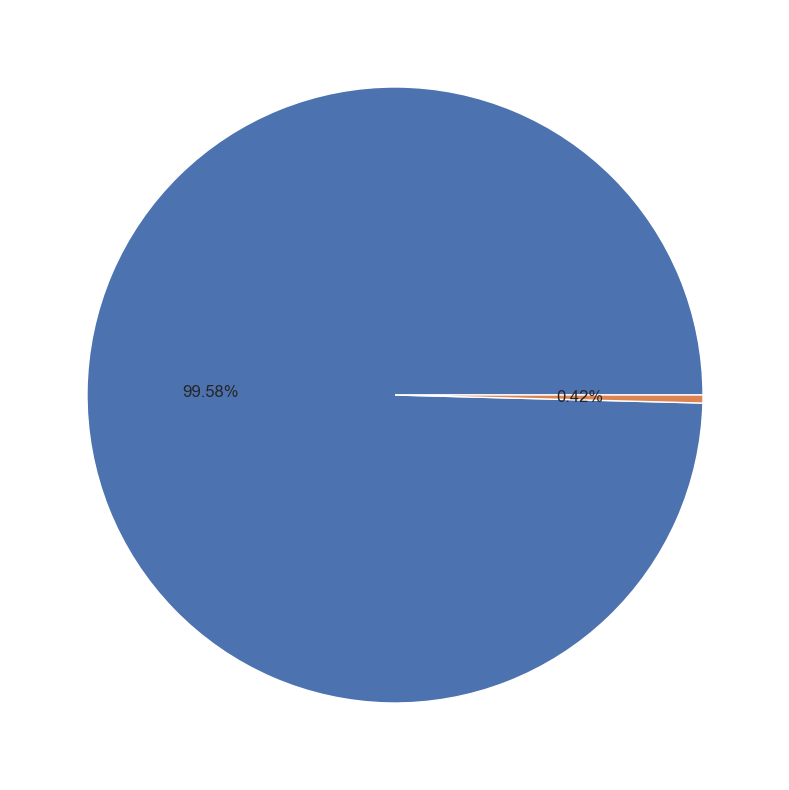

In [99]:
plt.pie(numeric_cols['isFraud'].value_counts(),  autopct='%.2f%%')

<Axes: >

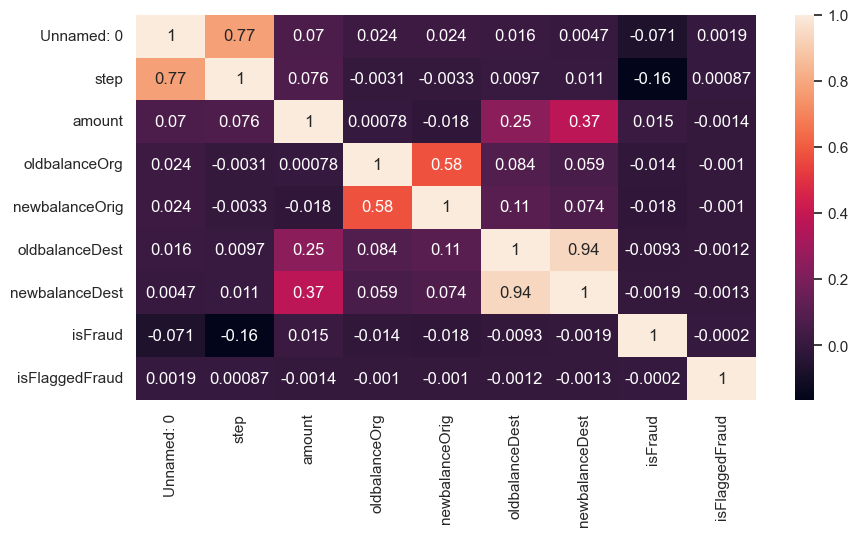

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(numeric_cols.corr(),annot=True)

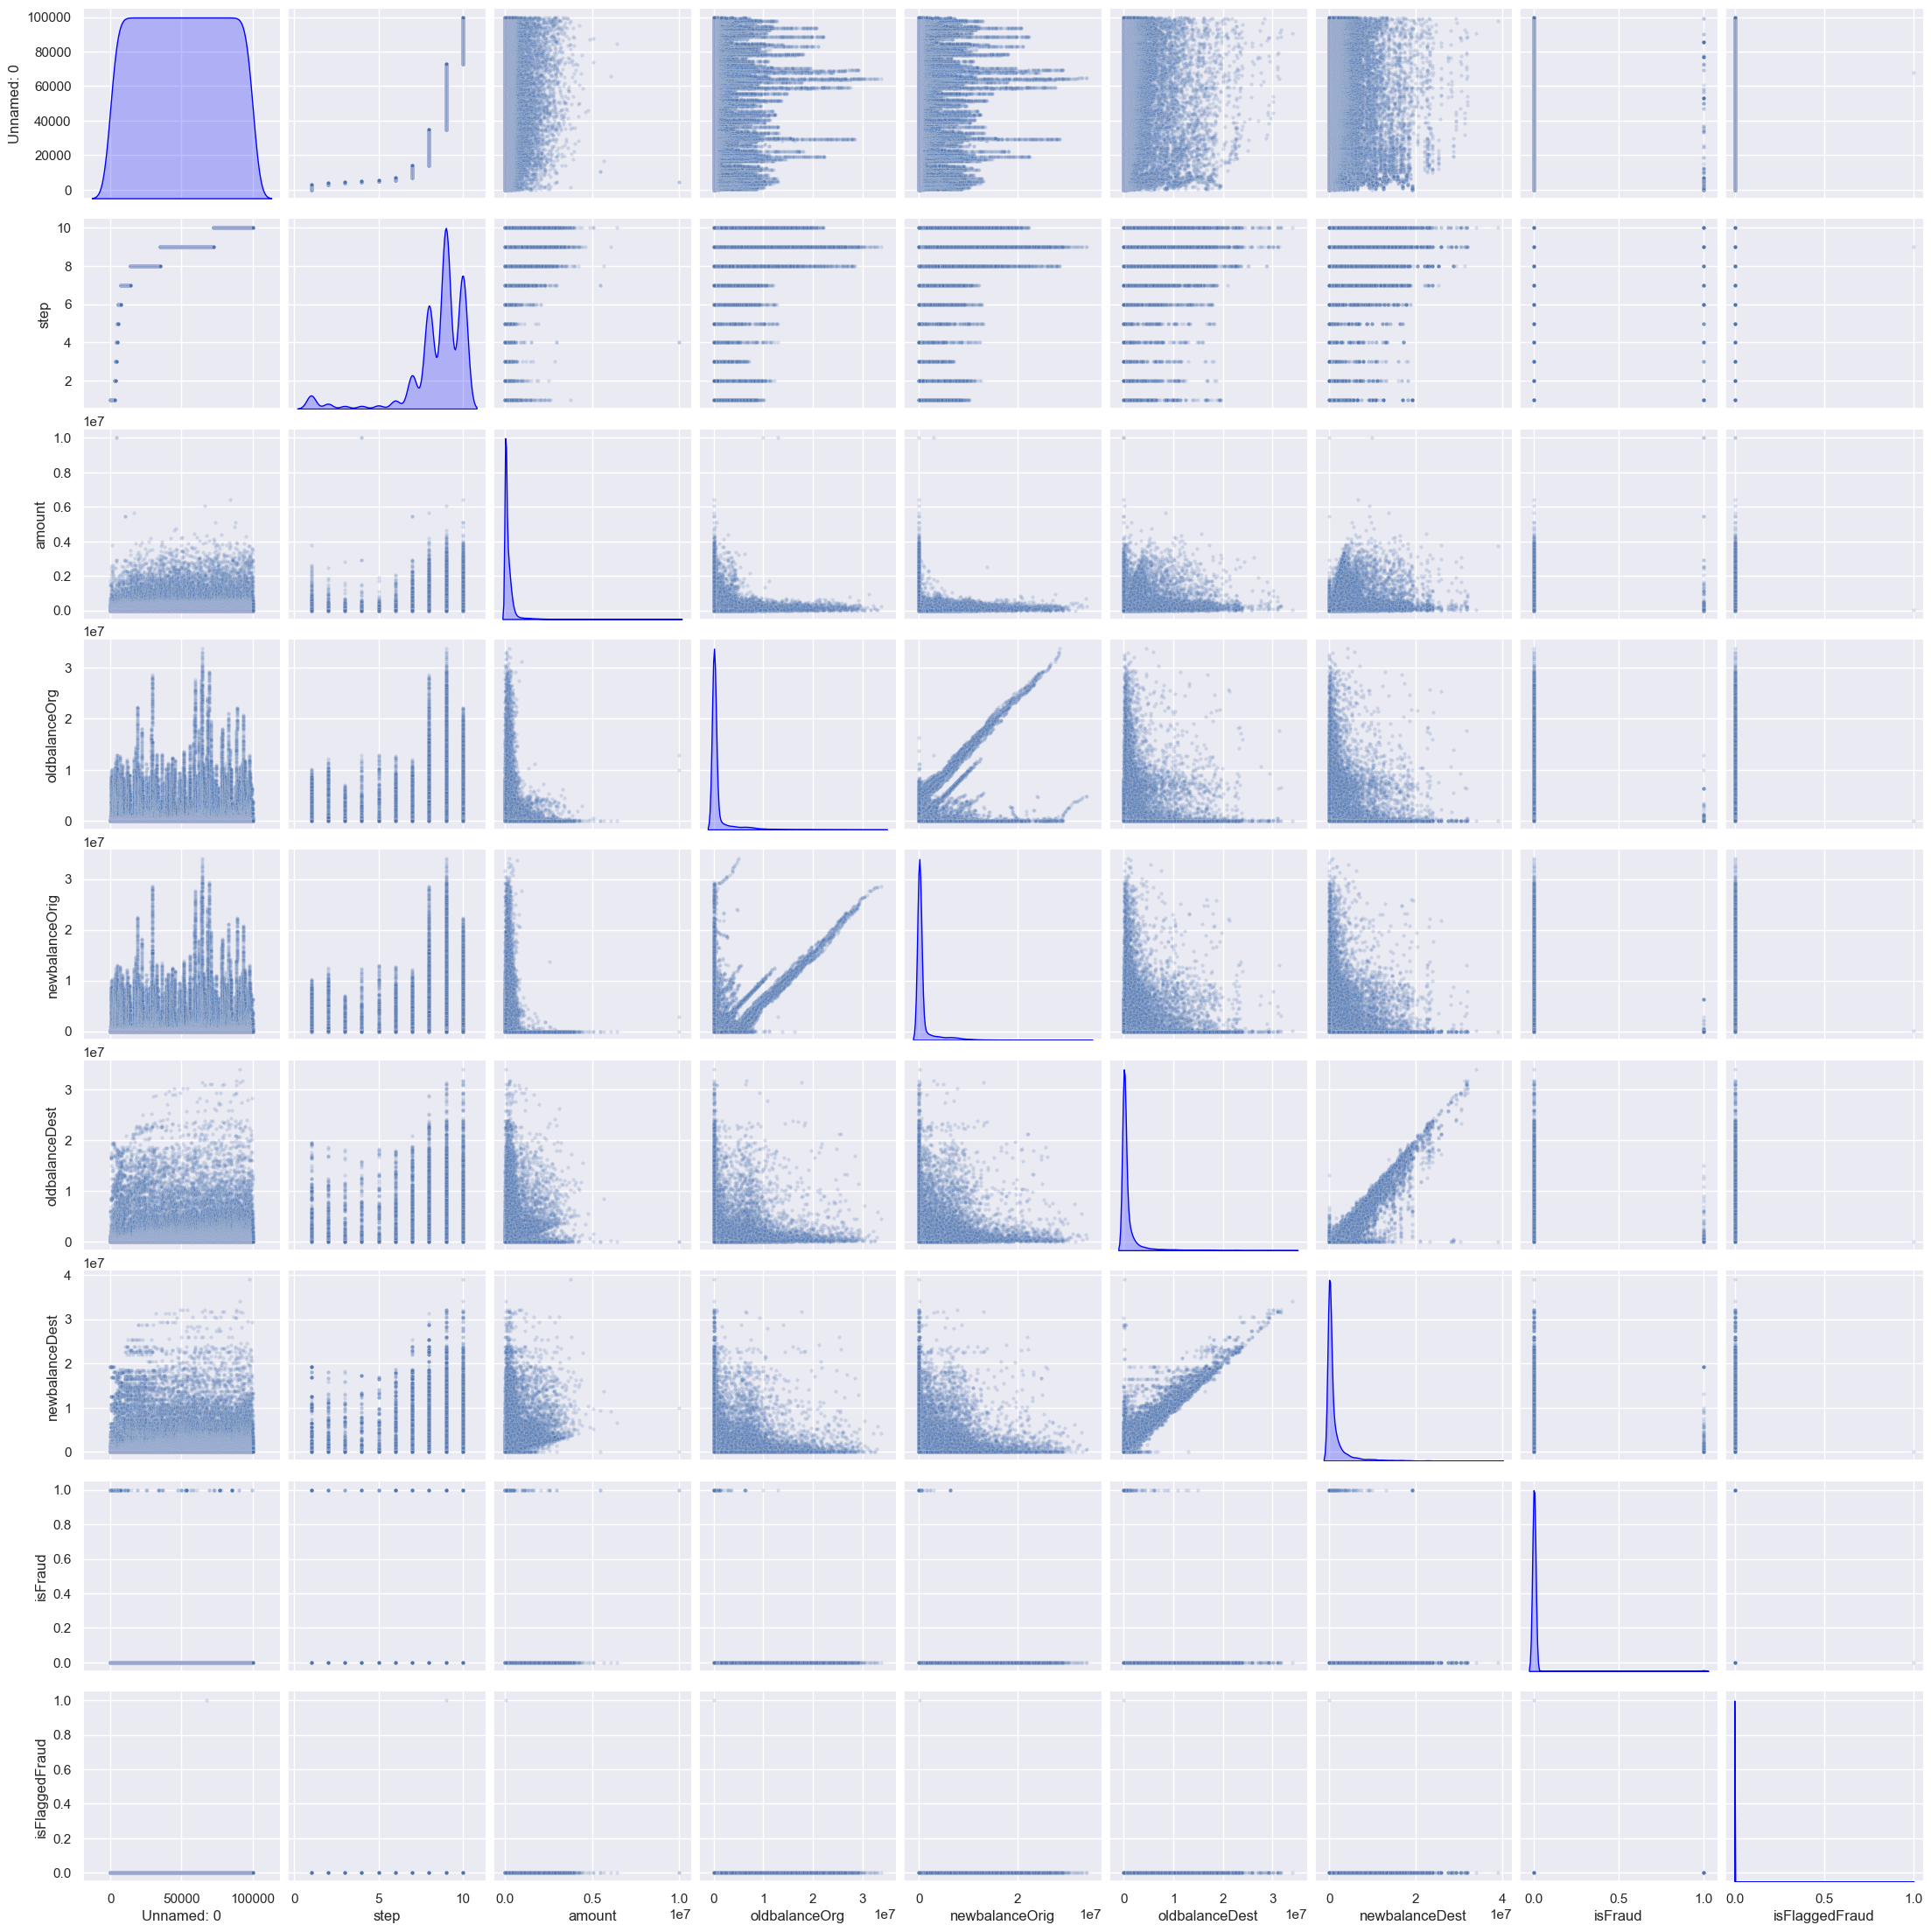

In [101]:
sns.pairplot(numeric_cols, diag_kind='kde', 
             plot_kws={'alpha': 0.2, 's': 10}, 
             diag_kws={'bw_adjust': 1.5, 'color': 'blue'},
             palette='coolwarm')

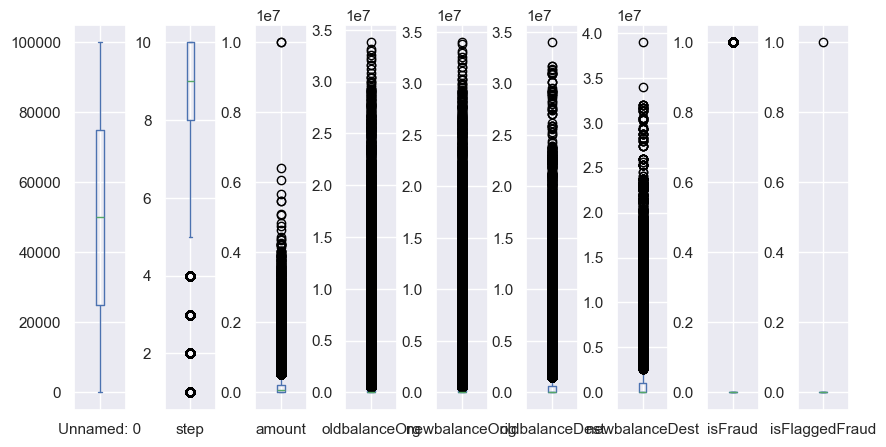

In [102]:
#to find wheather it has outlier using box plot
numeric_cols.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 5))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [103]:
import sweetviz

my_report = sweetviz.analyze([AML_Data,'AML_Data'])


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [104]:
reqData = pd.read_csv('Money_Laundering_Dataset.csv')

In [105]:
reqData

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,99996.0,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,99997.0,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,99998.0,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [106]:
#Removing unwanted columns
reqData.drop(['Unnamed: 0','step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
reqData = reqData.reset_index(drop=True)

In [107]:
reqData = reqData.dropna(subset=["isFraud"])

In [108]:
X = pd.DataFrame(reqData.iloc[:, 0:6])
Y = pd.DataFrame(reqData.iloc[:, 6])

In [109]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00
2,TRANSFER,181.00,181.0,0.00,0.00,0.00
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...,...
99982,PAYMENT,4883.01,NaN,0.00,0.00,0.00
99983,PAYMENT,2125.26,NaN,4437.74,0.00,0.00
99984,CASH_OUT,73658.67,NaN,0.00,847020.94,814955.79
99985,CASH_IN,81261.11,NaN,197838.11,334858.84,309263.55


In [110]:
Y

,isFraud
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
99982,0.0
99983,0.0
99984,0.0
99985,0.0


In [111]:
#Splitting the data into categorical and numerical
df_cate = X.select_dtypes(include=['object']).columns
df_num = X.select_dtypes(exclude=['object']).columns

In [112]:
for feature in reqData.columns:
    print("{} - has - {} - number of unique categories".format(feature, reqData[feature].nunique()))

type - has - 5 - number of unique categories
amount - has - 99155 - number of unique categories
oldbalanceOrg - has - 57936 - number of unique categories
newbalanceOrig - has - 48057 - number of unique categories
oldbalanceDest - has - 53393 - number of unique categories
newbalanceDest - has - 19123 - number of unique categories
isFraud - has - 2 - number of unique categories


In [113]:
print(df_cate)
print('\n')
print(df_num)

Index(['type'], dtype='object')


Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [114]:
#checking for missing values

reqData.isnull().sum()

type                0
amount              0
oldbalanceOrg     130
newbalanceOrig     22
oldbalanceDest     52
newbalanceDest      0
isFraud             0
dtype: int64

In [115]:
# Define pipeline for missing data if any

num_pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='median'))])
preprocessor = ColumnTransformer(transformers=[('median',num_pipeline,df_num)])

# Fit the imputation pipeline to input features
imputation = preprocessor.fit(X)

#save the pipeline
joblib.dump(imputation,'medianimpute')

['medianimpute']

In [116]:
# Transformed data
cleandata = pd.DataFrame(imputation.transform(X), columns = df_num)
cleandata.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [117]:
reqData[df_num].fillna(reqData[df_num].median(),inplace=True)

In [118]:
reqData

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0
2,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0
...,...,...,...,...,...,...,...
99982,PAYMENT,4883.01,NaN,0.00,0.00,0.00,0.0
99983,PAYMENT,2125.26,NaN,4437.74,0.00,0.00,0.0
99984,CASH_OUT,73658.67,NaN,0.00,847020.94,814955.79,0.0
99985,CASH_IN,81261.11,NaN,197838.11,334858.84,309263.55,0.0


In [119]:
cleandata

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.00,0.00
1,1864.28,21249.0,19384.72,0.00,0.00
2,181.00,181.0,0.00,0.00,0.00
3,181.00,181.0,0.00,21182.00,0.00
4,11668.14,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...
99678,4883.01,20173.0,0.00,0.00,0.00
99679,2125.26,20173.0,4437.74,0.00,0.00
99680,73658.67,20173.0,0.00,847020.94,814955.79
99681,81261.11,20173.0,197838.11,334858.84,309263.55


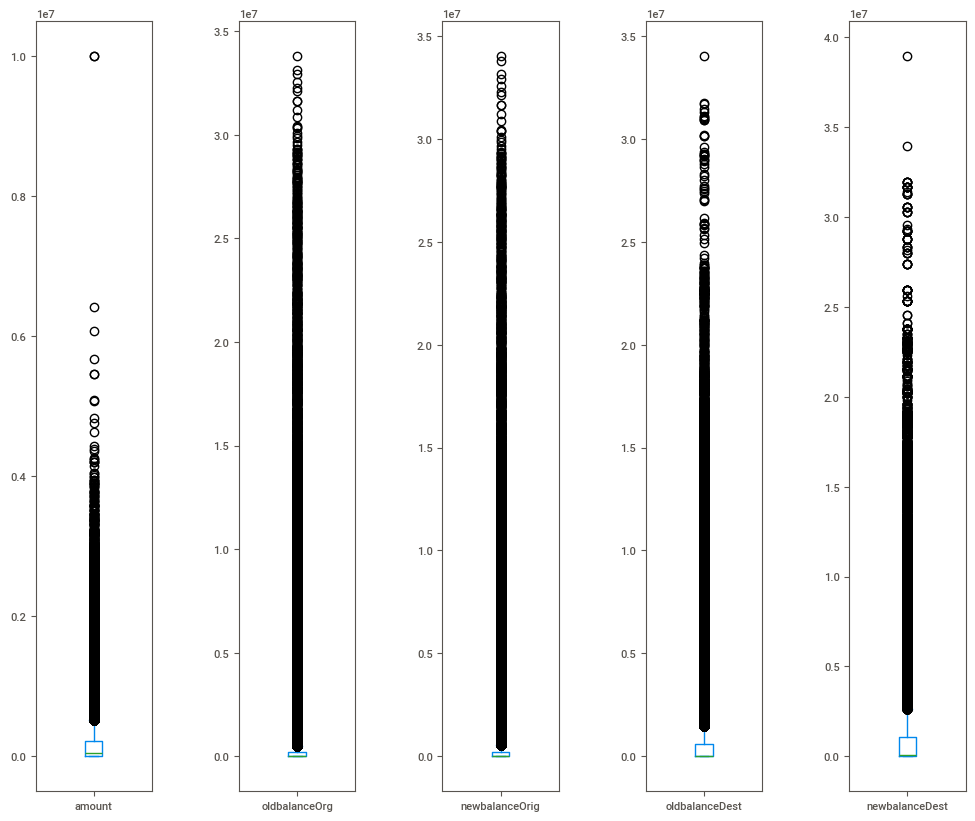

In [120]:
#to find wheather it has outlier using box plot
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 10))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [121]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr',
                          tail = 'both', fold = 1.5, variables = list(cleandata.columns))

clean = winsor.fit(cleandata)

# Save winsorizer model
joblib.dump(clean, 'winsor')

['winsor']

In [122]:
cleandata1 = clean.transform(cleandata)
cleandata1

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.00,0.00
1,1864.28,21249.0,19384.72,0.00,0.00
2,181.00,181.0,0.00,0.00,0.00
3,181.00,181.0,0.00,21182.00,0.00
4,11668.14,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...
99678,4883.01,20173.0,0.00,0.00,0.00
99679,2125.26,20173.0,4437.74,0.00,0.00
99680,73658.67,20173.0,0.00,847020.94,814955.79
99681,81261.11,20173.0,197838.11,334858.84,309263.55


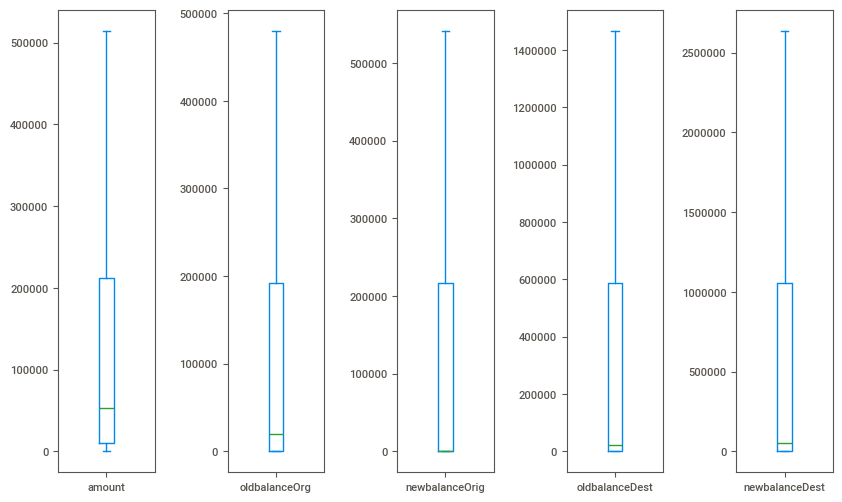

In [123]:
# Boxplot
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [124]:
#scaling with min-max scaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, df_num)])
scale = scale_columntransfer.fit(cleandata1)

In [125]:
# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax')

['minmax']

In [126]:
scaled_data = pd.DataFrame(scale.transform(cleandata1))
scaled_data
scaled_data.describe()

,0,1,2,3,4
count,99683.000000,99683.000000,99683.000000,99683.000000,99683.000000
mean,0.254795,0.263568,0.251573,0.252919,0.245379
std,0.305937,0.386628,0.388805,0.369740,0.358906
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019354,0.000000,0.000000,0.000000,0.000000
50%,0.101934,0.042077,0.000000,0.014073,0.018624
75%,0.411612,0.400000,0.400000,0.400000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
#zero variance and near zero variance
scaled_data.var() == 0

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [128]:
#encoding categorical features
encoding_pipeline = Pipeline(steps = [('lable', OneHotEncoder(drop = 'if_binary'))])
preprocess_pipeline1 = ColumnTransformer(transformers = [('categorical', encoding_pipeline, df_cate)])
clean1 = preprocess_pipeline1.fit(X)
joblib.dump(clean1, 'encode')

['encode']

In [129]:
encode_data = pd.DataFrame(clean1.transform(X).todense())
encode_data

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
99678,0.0,0.0,0.0,1.0,0.0
99679,0.0,0.0,0.0,1.0,0.0
99680,0.0,1.0,0.0,0.0,0.0
99681,1.0,0.0,0.0,0.0,0.0


In [130]:
clean_data = pd.concat([scaled_data, encode_data], axis=1 , ignore_index = True)
clean_data

,0,1,2,3,4,5,6,7,8,9
0,0.019150,0.354870,0.296393,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.003628,0.044321,0.035843,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.000352,0.000378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000352,0.000378,0.000000,0.014460,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.022708,0.086673,0.055260,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99678,0.009503,0.042077,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99679,0.004136,0.042077,0.008206,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99680,0.143358,0.042077,0.000000,0.578205,0.309379,0.0,1.0,0.0,0.0,0.0
99681,0.158154,0.042077,0.365809,0.228586,0.117405,1.0,0.0,0.0,0.0,0.0


In [131]:
X


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00
2,TRANSFER,181.00,181.0,0.00,0.00,0.00
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00
...,...,...,...,...,...,...
99982,PAYMENT,4883.01,NaN,0.00,0.00,0.00
99983,PAYMENT,2125.26,NaN,4437.74,0.00,0.00
99984,CASH_OUT,73658.67,NaN,0.00,847020.94,814955.79
99985,CASH_IN,81261.11,NaN,197838.11,334858.84,309263.55


In [132]:
X['type'].nunique()

5

In [133]:
clean_data

,0,1,2,3,4,5,6,7,8,9
0,0.019150,0.354870,0.296393,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.003628,0.044321,0.035843,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.000352,0.000378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000352,0.000378,0.000000,0.014460,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.022708,0.086673,0.055260,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99678,0.009503,0.042077,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99679,0.004136,0.042077,0.008206,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99680,0.143358,0.042077,0.000000,0.578205,0.309379,0.0,1.0,0.0,0.0,0.0
99681,0.158154,0.042077,0.365809,0.228586,0.117405,1.0,0.0,0.0,0.0,0.0


In [134]:
X = clean_data
X

,0,1,2,3,4,5,6,7,8,9
0,0.019150,0.354870,0.296393,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.003628,0.044321,0.035843,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.000352,0.000378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000352,0.000378,0.000000,0.014460,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.022708,0.086673,0.055260,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99678,0.009503,0.042077,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99679,0.004136,0.042077,0.008206,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99680,0.143358,0.042077,0.000000,0.578205,0.309379,0.0,1.0,0.0,0.0,0.0
99681,0.158154,0.042077,0.365809,0.228586,0.117405,1.0,0.0,0.0,0.0,0.0


In [135]:
from imblearn.over_sampling import SMOTE
Y

,isFraud
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
99982,0.0
99983,0.0
99984,0.0
99985,0.0


In [136]:
over_sample = SMOTE()
feat,label = over_sample.fit_resample(X,Y)

<Axes: xlabel='isFraud', ylabel='count'>

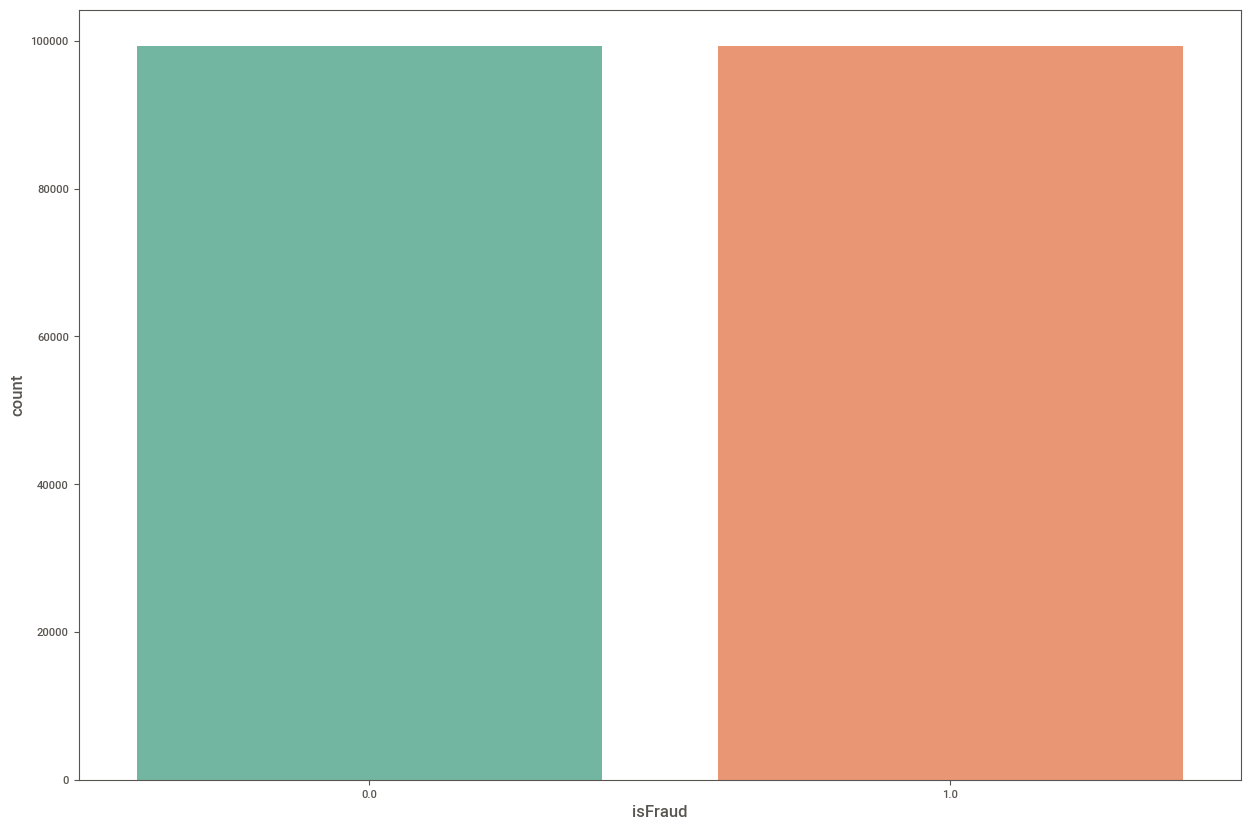

In [137]:
sns.countplot(data=label,x="isFraud", palette='Set2')

In [138]:
feat

,0,1,2,3,4,5,6,7,8,9
0,0.019150,0.354870,0.296393,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.003628,0.044321,0.035843,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.000352,0.000378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000352,0.000378,0.000000,0.014460,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.022708,0.086673,0.055260,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
198531,0.004371,0.044454,0.035255,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
198532,0.003273,0.022643,0.016962,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
198533,0.017514,0.000000,0.000000,0.002897,0.000939,0.0,1.0,0.0,0.0,0.0
198534,0.002652,0.022651,0.017560,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 42)

In [140]:
X_train.shape, y_train.shape

((138975, 10), (138975, 1))

In [141]:
X_test.shape, y_test.shape

((59561, 10), (59561, 1))

<Axes: >

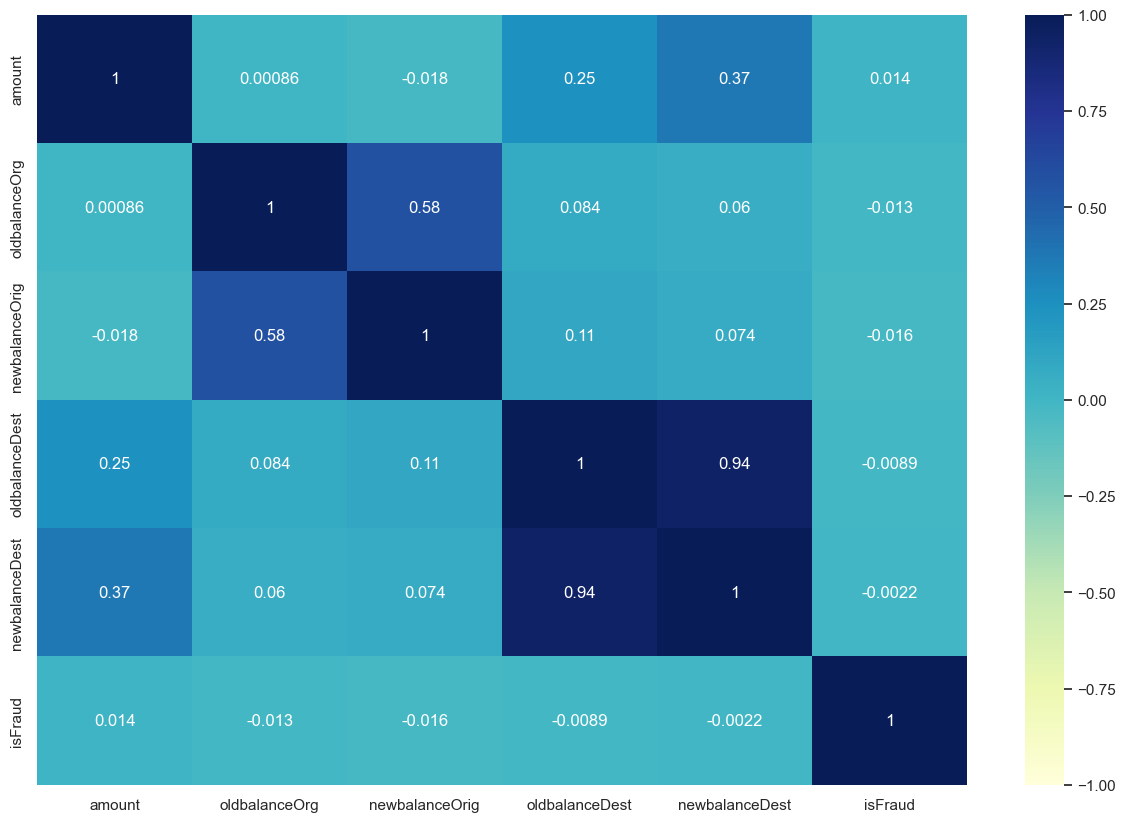

In [142]:
combined_data = pd.concat([cleandata, Y], axis=1)
correlation_matrix = combined_data.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)


In [143]:
corr=round(correlation_matrix[[feature for feature in correlation_matrix.columns]].corr(),2)
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.00,-0.53,-0.55,0.23,0.36,-0.30
oldbalanceOrg,-0.53,1.00,0.79,-0.41,-0.48,-0.37
newbalanceOrig,-0.55,0.79,1.00,-0.37,-0.45,-0.38
oldbalanceDest,0.23,-0.41,-0.37,1.00,0.99,-0.43
newbalanceDest,0.36,-0.48,-0.45,0.99,1.00,-0.43
isFraud,-0.30,-0.37,-0.38,-0.43,-0.43,1.00


In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

In [145]:
# Define a list of classifiers to test

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    
]

In [146]:
for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f" {clf.__class__.__name__} evaluation: ".center(100,"#"))
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print()

################################# KNeighborsClassifier evaluation: #################################
Accuracy: 0.929
Confusion Matrix:
[[26386  3228]
 [  991 28956]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93     29614
         1.0       0.90      0.97      0.93     29947

    accuracy                           0.93     59561
   macro avg       0.93      0.93      0.93     59561
weighted avg       0.93      0.93      0.93     59561


################################ DecisionTreeClassifier evaluation: ################################
Accuracy: 0.938
Confusion Matrix:
[[27466  2148]
 [ 1564 28383]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     29614
         1.0       0.93      0.95      0.94     29947

    accuracy                           0.94     59561
   macro avg       0.94      0.94      0.94     59561
weighted avg       0.9

In [147]:
import pickle
import os
file_path = 'model.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(AML_Data, f)

In [149]:
print(type(AML_Data.head()))
# print(numeric_cols.head())

TypeError: 'Series' object is not callable

In [ ]:
print(numeric_cols.head())

   Unnamed: 0  step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         0.0   1.0   9839.64       170136.0       160296.36             0.0   
1         1.0   1.0   1864.28        21249.0        19384.72             0.0   
2         2.0   1.0    181.00          181.0            0.00             0.0   
3         3.0   1.0    181.00          181.0            0.00         21182.0   
4         4.0   1.0  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0      0.0             0.0  
1             0.0      0.0             0.0  
2             0.0      1.0             0.0  
3             0.0      1.0             0.0  
4             0.0      0.0             0.0  


In [ ]:
print(type(reqData.head()))

TypeError: 'Series' object is not callable